<div align="center">
    <img src='../images/duration-prediction-banner2.png' alt='duration-prediction-banner' height=400 width=900/>
</div>

# Import libraries

In [188]:
# Data manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import root_mean_squared_error

# Read Datasets

In [189]:
# Read The datasets in parquet format
# Train data
train_df = pd.read_parquet("../dataset/green_tripdata_2023-01.parquet")

# Validation Data
val_df = pd.read_parquet("../dataset/green_tripdata_2023-02.parquet")

# Data Exploration & Preprocessing

In [190]:
# Show Some sample Datapoints 
train_df.sample(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
21982,2,2023-01-12 07:28:54,2023-01-12 07:47:25,N,1.0,166,237,1.0,4.30,21.2,0.0,0.5,5.09,0.00,None,1.0,30.54,1.0,1.0,2.75
52056,2,2023-01-26 11:51:12,2023-01-26 12:49:05,N,5.0,152,223,2.0,9.22,55.0,0.0,0.0,0.00,6.55,None,1.0,62.55,2.0,2.0,0.00
32868,2,2023-01-17 15:21:17,2023-01-17 15:31:16,N,1.0,75,236,1.0,0.82,10.0,0.0,0.5,0.00,0.00,None,1.0,14.25,2.0,1.0,2.75
9170,2,2023-01-05 22:29:05,2023-01-05 22:35:20,N,1.0,95,95,1.0,1.06,7.9,1.0,0.5,0.00,0.00,None,1.0,10.40,2.0,1.0,0.00
42558,2,2023-01-21 22:32:16,2023-01-21 22:40:16,N,1.0,216,216,1.0,0.92,8.6,1.0,0.5,3.50,0.00,None,1.0,14.60,1.0,1.0,0.00


## Feature Details

The Data Dictionary Downloaded from this [link](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf).

| Feature           | Feature Description |
| :---------------- | :----------------- |
| **VendorID**      |   A code indicating the LPEP provider that provided the record.</br>1 = Creative Mobile Technologies, LLC</br>2 = Curb Mobility, LLC</br>6 = Myle Technologies Inc   |
| **lpep_pickup_datetime**          |   The date and time when the meter was engaged.   |
| **lpep_dropoff_datetime**   |  The date and time when the meter was disengaged.    |
| **store_and_fwd_flag** |  This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.   |
| **RatecodeID** |  The final rate code in effect at the end of the trip.</br>1 = Standard rate</br>2 = JFK</br>3 = Newark</br>4 = Nassau or Westchester</br>5 = Negotiated fare</br>6 = Group ride</br>99 = Null/unknown   |
| **PULocationID** |  TLC Taxi Zone in which the taximeter was engaged.   |
| **DOLocationID** |  TLC Taxi Zone in which the taximeter was disengaged.   |
| **passenger_count** |  The number of passengers in the vehicle.   |
| **trip_distance** |  The elapsed trip distance in miles reported by the taximeter.   |
| **fare_amount** |  The time-and-distance fare calculated by the meter. For additional information on the following columns, see https://www.nyc.gov/site/tlc/passengers/taxi-fare.page   |
| **extra** |  Miscellaneous extras and surcharges.   |
| **mta_tax** |  Tax that is automatically triggered based on the metered rate in use.   |
| **tip_amount** |  Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.   |
| **tolls_amount** |  Total amount of all tolls paid in trip.   |
| **improvement_surcharge** |  Improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.   |
| **total_amount** |  The total amount charged to passengers. Does not include cash tips.   |
| **payment_type** |  A numeric code signifying how the passenger paid for the trip.</br>0 = Flex Fare trip</br>1 = Credit card</br>2 = Cash</br>3 = No charge</br>4 = Dispute</br>5 = Unknown</br>6 = Voided trip   |
| **trip_type** |  A code indicating whether the trip was a street-hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver.</br>1 = Street-hail</br>2 = Dispatch   |
| **congestion_surcharge** |  Total amount collected in trip for NYS congestion surcharge.   |
| **cbd_congestion_fee** |  Per-trip charge for MTA's Congestion Relief Zone starting Jan. 5, 2025. <mark>(Not Important for this dataset)</mark>  |


In [191]:
# Shape of the datasets (Train)
print(f"There are {train_df.shape[0]} datapoints and {train_df.shape[1]} features in train dataset.")

# Shape of the datasets (Validation)
print(f"There are {val_df.shape[0]} datapoints and {val_df.shape[1]} features in train dataset.")

There are 68211 datapoints and 20 features in train dataset.
There are 64809 datapoints and 20 features in train dataset.


## Check for NaN Values

In [193]:
# Check for NaN values
train_df.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

**ehail_fee**  is null for each row, and also there other features with Nan value.

In [194]:
# Check Which records are null
train_df[train_df.isnull()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
1,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
2,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
3,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
4,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,NaN,NaT,NaT,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
68207,NaN,NaT,NaT,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
68208,NaN,NaT,NaT,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
68209,NaN,NaT,NaT,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN


# Trip Duration

In [195]:
# Check if pickup-time and dropoff-time are datetime or not
train_df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

In [196]:
# Calculate Duration and asign new column to the dataframe (Train)
train_df['duration'] = train_df.lpep_dropoff_datetime - train_df.lpep_pickup_datetime

# Calculate Duration and asign new column to the dataframe (Validation)
val_df['duration'] = val_df.lpep_dropoff_datetime - val_df.lpep_pickup_datetime

In [197]:
# convert datetime to minutes in float to be prapare for our machine learning model (Train)
train_df.duration = train_df.duration.apply(lambda x : x.total_seconds() / 60)

# convert datetime to minutes in float to be prapare for our machine learning model (Validation)
val_df.duration = val_df.duration.apply(lambda x : x.total_seconds() / 60)

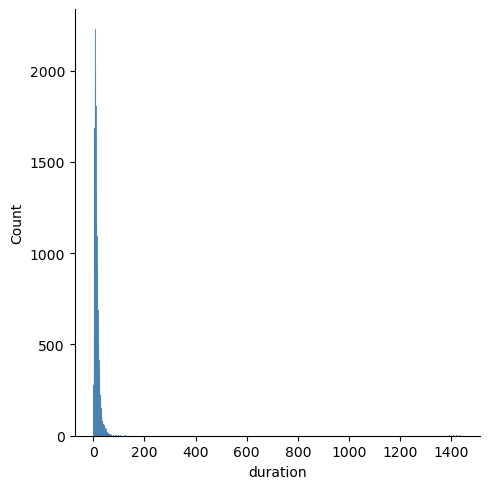

In [198]:
# Plot the distribution of the duration
sns.displot(train_df.duration)
plt.show()

In [199]:
# Get some Descriptive Statistics
train_df.duration.describe(percentiles=[.95, .98, .99])

count    68211.000000
mean        18.097271
std         74.925631
min          0.000000
50%         11.400000
95%         33.266667
98%         45.616667
99%         58.115000
max       1439.883333
Name: duration, dtype: float64

It shows that 98% of the data is in 1 hour. so in bussiness point of view it makes sense to focus on this duration.

In [200]:
((train_df.duration >= 1) & (train_df.duration <= 60)).mean()

np.float64(0.9667942120772309)

In [201]:
# Select Portion of data that is more important for us (Train)
train_df = train_df[(train_df.duration >= 1) & (train_df.duration <= 60)]

# Select Portion of data that is more important for us (Validation)
val_df = val_df[(val_df.duration >= 1) & (val_df.duration <= 60)]

# Feature Selection

In [202]:
# Selected Features
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

# Covert selected categorical features to object type (Train)
train_df[categorical] = train_df[categorical].astype(str)

# Covert selected categorical features to object type (Validation)
val_df[categorical] = val_df[categorical].astype(str)

# Onehot Encoding / Dictionary Vectorizer

In [204]:
# Convert Selected Features to dictionary (Train)
train_dicts = train_df[categorical + numerical].to_dict(orient='records')

# Convert Selected Features to dictionary (Validation)
val_dicts = val_df[categorical + numerical].to_dict(orient='records')

# Create Feature Matrix
dv = DictVectorizer()
# Feature Matrix for train dataset
X_train = dv.fit_transform(train_dicts)

# Feature Matrix for validation dataset
X_val = dv.fit_transform(val_dicts)


# Train Model

In [205]:
# Target Variable
target = 'duration'
y_train = train_df[target].values # (Train)
y_val = val_df[target].values # (Validation)

# Train Model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

# Evaluate Model

In [206]:
# Test Model on Train data
y_pred_train = lr.predict(X_train)

root_mean_squared_error(y_train, y_pred_train)

7.0603515387765565

The root mean square error is 7, indicating that our model is, on average, incorrect by 7 minutes.

/tmp/ipykernel_232968/1469882058.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_train, label='prediction')
/tmp/ipykernel_232968/1469882058.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


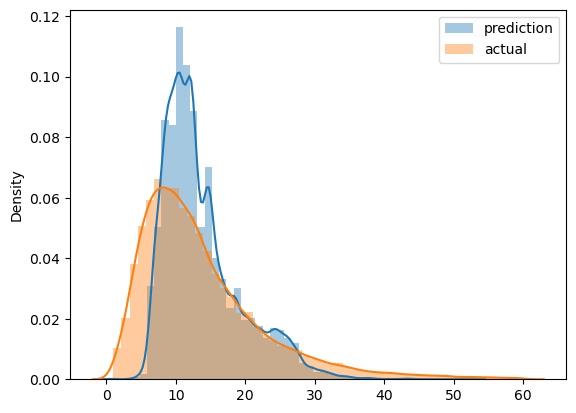

In [207]:
sns.distplot(y_pred_train, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [208]:
# Test Model on Validation data
y_pred_val = lr.predict(X_val)

root_mean_squared_error(y_val, y_pred_val)

ValueError: X has 463 features, but LinearRegression is expecting 468 features as input.

In [209]:
X_val.shape

(62574, 463)

In [186]:
X_train.shape

(65946, 468)